In [2]:
# Import the necessary libraries
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

In [3]:
# Load the dataset into a Pandas dataframe
df = pd.read_csv('finalDataset.csv')

df

,id,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,year
0,7lmeHLHBe4nmXzuXc0HDjk,0,0.470,0.978,7,-5.399,1,0.0727,0.02610,0.000011,0.3560,0.503,117.906,210133,4.0,1999
1,1wsRitfRRtWyEapl0q22o8,1,0.599,0.957,11,-5.764,1,0.1880,0.01290,0.000071,0.1550,0.489,103.680,206200,4.0,1999
2,1hR0fIFK2qRG3f3RF70pb7,0,0.315,0.970,7,-5.424,1,0.4830,0.02340,0.000002,0.1220,0.370,149.749,298893,4.0,1999
3,2lbASgTSoDO7MTuLAXlTW0,1,0.440,0.967,11,-5.830,0,0.2370,0.16300,0.000004,0.1210,0.574,96.752,213640,4.0,1999
4,1MQTmpYOZ6fcMQc56Hdo7T,0,0.426,0.929,2,-6.729,1,0.0701,0.00162,0.105000,0.0789,0.539,127.059,205600,4.0,1999
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1204007,0EsMifwUmMfJZxzoMPXJKZ,0,0.264,0.966,5,-6.970,0,0.0672,0.00935,0.002240,0.3370,0.415,159.586,276213,4.0,2014
1204008,2WSc2TB1CSJgGE0PEzVeiu,0,0.796,0.701,11,-6.602,0,0.0883,0.10400,0.644000,0.0749,0.781,121.980,363179,4.0,2014
1204009,6iProIgUe3ETpO6UT0v5Hg,0,0.785,0.796,9,-5.960,0,0.0564,0.03040,0.918000,0.0664,0.467,121.996,385335,4.0,2014
1204010,37B4SXC8uoBsUyKCWnhPfX,0,0.665,0.856,6,-6.788,0,0.0409,0.00007,0.776000,0.1170,0.227,124.986,324455,4.0,2014


In [4]:
# Remove any rows with missing or invalid values
df.dropna(inplace=True)

# Select a subset of columns to use in the clustering process
columns_to_use = ['explicit', 'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms', 'year']
df = df[columns_to_use]

# Normalize the values of each column
df = (df - df.mean()) / df.std()
df

,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,year
890394,-0.271478,-0.907130,0.873706,-0.337647,0.619117,0.699492,-0.431768,-1.152035,-0.390288,-0.490967,0.144248,0.902832,0.430628,0.055556
152161,-0.271478,0.426771,-0.283467,0.227848,0.151496,0.699492,-0.511947,0.473116,-0.751683,-0.208354,0.155340,-1.299029,-0.199168,-2.836725
1014856,-0.271478,-0.738416,-0.958768,-0.620395,-1.047707,-1.429607,-0.345555,0.854734,-0.751713,2.019307,-0.772630,0.075377,-0.552350,1.047195
459910,-0.271478,-0.743688,0.948362,-1.468638,1.170667,0.699492,-0.379178,0.312161,1.496580,-0.695447,1.342106,-0.788734,-0.871293,0.220829
449202,-0.271478,0.764200,0.928001,0.510596,0.738995,0.699492,-0.485221,-1.153904,-0.751497,0.301459,1.190525,0.084815,-0.508642,-0.274990
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
134069,-0.271478,0.047162,-1.036818,1.358838,-0.824566,0.699492,0.127755,1.337599,1.451402,0.933184,0.347588,-0.703399,0.242151,0.138193
1133157,3.683540,1.607774,0.188225,1.358838,0.024171,-1.429607,0.263972,-1.053878,-0.751716,0.500951,-0.484257,-0.570193,-0.461376,1.047195
178408,-0.271478,-1.228743,-1.586220,0.793343,-2.351318,0.699492,-0.328313,0.828774,-0.751690,-0.688243,-0.913119,0.327017,0.145981,-0.109717
759454,-0.271478,-1.012577,0.429161,1.076091,-0.351072,0.699492,2.246877,1.337599,-0.662422,2.739694,-1.264713,-0.411548,1.034452,-0.688173


In [5]:
# Initialize an empty list to store the sum of squared distances for each number of clusters
sse = [] 

# Fit the KMeans model to the data with a range of different numbers of clusters
for k in range(1, 50):
    kmeans = KMeans(n_clusters=k, n_init='auto')
    kmeans.fit(df)
    sse.append(kmeans.inertia_)  # Add the sum of squared distances for the current number of clusters to the list

KeyboardInterrupt: 

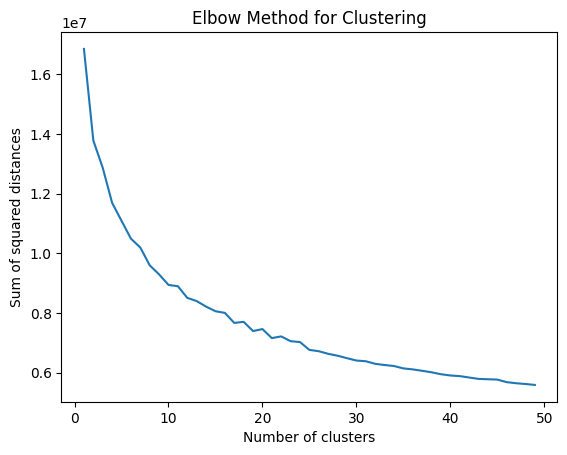

In [ ]:
# Plot the sum squared distances for each number of clusters for elbow method

plt.plot(range(1, 50), sse)
plt.title('Elbow Method for Clustering')
plt.xlabel('Number of clusters')
plt.ylabel('Sum of squared distances')
plt.show()

### Fit the clustering model to the preprocessed data

In [ ]:
# Initialize the KMeans model with 8 clusters
kmeans = KMeans(n_clusters=20, n_init='auto', random_state=1)

# Fit the model to the data
kmeans.fit(df)  

KMeans(n_clusters=20, n_init='auto', random_state=1)

In [ ]:
# Generate cluster assignments for each data point
clusters = kmeans.predict(df)

# Print the cluster assignments for the first few data points
print(clusters[:10])

[15  8 16 17  1 16 15  5 15 15]


# Evaluate the quality of the generated clusters

In [ ]:
# Calculate the silhouette score for the generated clusters
silhouette_score(df, clusters)